## Bagging (Random Forest)

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [228]:
df = pd.read_csv('./Datasets/exp_3.csv')

In [229]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [231]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [232]:
df.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [233]:
df['Class'].value_counts()

Class
2    444
4    239
Name: count, dtype: int64

In [234]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [236]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
model = RandomForestClassifier(n_estimators=15)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [237]:
print(f'Train score: {round(model.score(x_train,y_train),2)}')
print(f'Test score: {round(model.score(x_test,y_test),2)}')

Train score: 1.0
Test score: 0.99


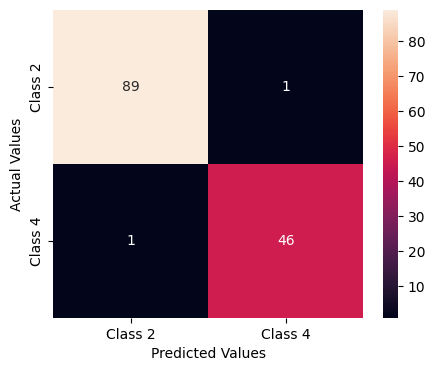

In [238]:
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,xticklabels=['Class 2','Class 4'],yticklabels=['Class 2','Class 4'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [239]:

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           2       0.99      0.99      0.99        90
           4       0.98      0.98      0.98        47

    accuracy                           0.99       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137



## Boosting (XGBoost)

In [240]:
from xgboost import XGBClassifier

In [241]:
df['Class'] = df['Class'].apply(lambda x: 0 if x==2 else 1)

In [242]:
df['Class'].value_counts()

Class
0    444
1    239
Name: count, dtype: int64

In [243]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [244]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
model = XGBClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [245]:
print(f'Train score: {round(model.score(x_train,y_train),2)}')
print(f'Test score: {round(model.score(x_test,y_test),2)}')

Train score: 1.0
Test score: 0.99


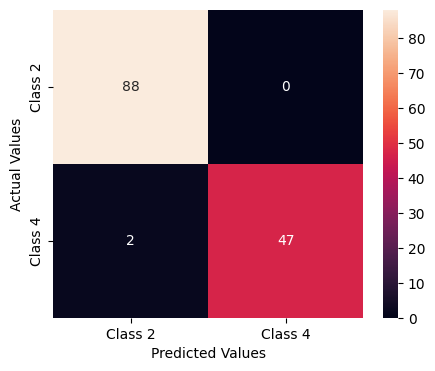

In [246]:
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,xticklabels=['Class 2','Class 4'],yticklabels=['Class 2','Class 4'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [247]:

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        88
           1       1.00      0.96      0.98        49

    accuracy                           0.99       137
   macro avg       0.99      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137

